# PROJECT: Abandonment of employees by a company

## invoke the libraries and csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../../data/Abandonment_employees.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,age,abandonment,travels,departament,house_distance,educations,career,employees,satisfaction_environment,sex,...,satisfaction_colleagues,fortnight_hours,action_level,experience_age,num_formations_last_year,conciliation,years_company,years_in_job,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Half,3.0,...,Low,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,High_school,Life Sciences,1,High,2.0,...,Highher,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High_school,Other,1,Highher,2.0,...,Half,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Highher,3.0,...,High,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,Highher,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,High,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High_school,Medical,1,Highher,2.0,...,Low,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Half,4.0,...,Half,80,1,6,0,NaN,6,NaN,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   int64  
 1   abandonment                 1470 non-null   object 
 2   travels                     1470 non-null   object 
 3   departament                 1470 non-null   object 
 4   house_distance              1470 non-null   int64  
 5   educations                  1369 non-null   object 
 6   career                      1470 non-null   object 
 7   employees                   1470 non-null   int64  
 8   satisfaction_environment    1470 non-null   object 
 9   sex                         1271 non-null   float64
 10  implication                 1452 non-null   object 
 11  job_level                   1470 non-null   int64  
 12  job                         1470 non-null   object 
 13  job_satisfaction            1394 non-n

In [7]:
df.isna().sum().sort_values(ascending = False)

years_in_job                  1238
conciliation                  1011
sex                            199
educations                     101
job_satisfaction                76
implication                     18
age                              0
action_level                     0
evaluation                       0
satisfaction_colleagues          0
fortnight_hours                  0
experience_age                   0
extra_time                       0
num_formations_last_year         0
years_company                    0
years_since_last_promotion       0
salary_increase_perc             0
salary_month                     0
older                            0
num_previous_companies           0
abandonment                      0
civil_status                     0
job                              0
job_level                        0
satisfaction_environment         0
employees                        0
career                           0
house_distance                   0
departament         

i can conclude:

years_in_job and conciliation have too many nulls --> delete Variables
sex, education, job_satisfaction and implication --> impute them after EDA

In [8]:
df.drop(columns = ['years_in_job','conciliation'], inplace = True)
df

,age,abandonment,travels,departament,house_distance,educations,career,employees,satisfaction_environment,sex,...,salary_increase_perc,evaluation,satisfaction_colleagues,fortnight_hours,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Half,3.0,...,11,High,Low,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,High_school,Life Sciences,1,High,2.0,...,23,Highher,Highher,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High_school,Other,1,Highher,2.0,...,15,High,Half,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Highher,3.0,...,11,High,High,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,12,High,Highher,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,17,High,High,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High_school,Medical,1,Highher,2.0,...,15,High,Low,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Half,4.0,...,20,Highher,Half,80,1,6,0,6,0,3


EDA CATEGORICAL VARIABLES

In [10]:
def graphics_eda_categoricos(cat):

     #We calculate the number of rows we need
     from math import ceil
     rows = ceil(cat.shape[1] / 2)

     #We define the graph
     f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

     #Flatten to iterate through the graph as if it were 1 dimension instead of 2
     ax = ax.flat

     #We create the loop that adds graphics
     for each, variable in enumerate(cat):
         cat[variable].value_counts().plot.barh(ax = ax[each])
         ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
         ax[each].tick_params(labelsize = 12)

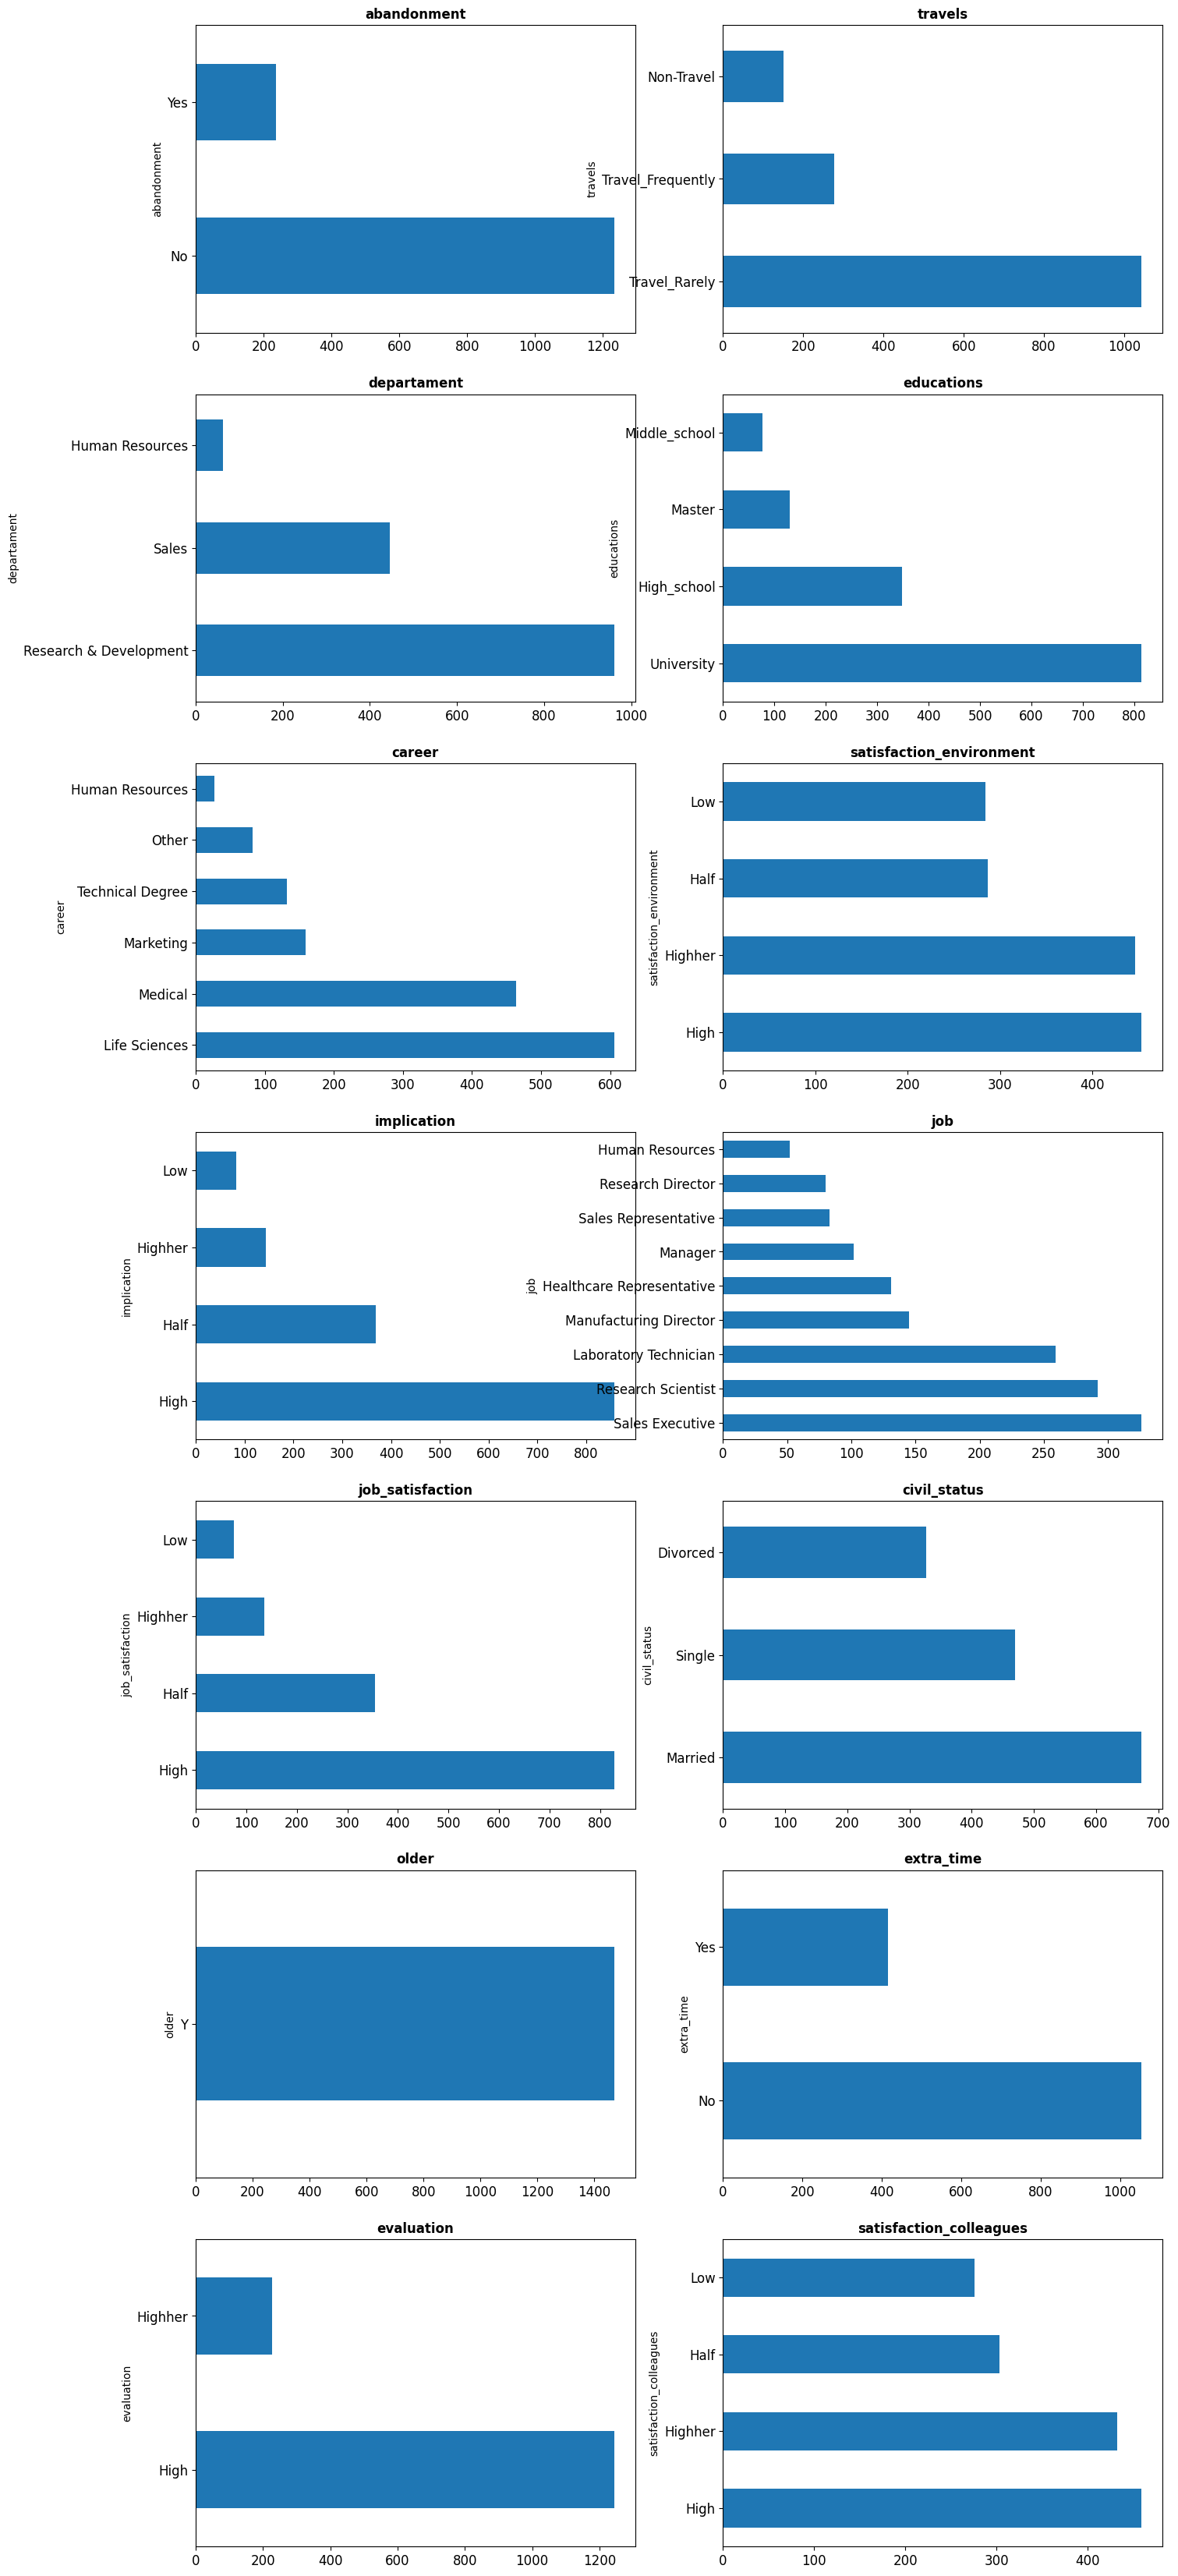

In [11]:
graphics_eda_categoricos(df.select_dtypes('O'))

Conclusions:

* older only has one value --> delete it
* Regarding pending imputations of categorical variables:
   * education: impute by 'University'
   * job_satisfaction: impute by 'High'
   * implication: impute for 'High'

In [12]:
df.drop(columns='older', inplace=True)

df['educations'] = df['educations'].fillna('University')

df['job_satisfaction'] = df['job_satisfaction'].fillna('High')

df['implication'] = df['implication'].fillna('High')

In [13]:
def estadistics_cont(num):
    #Calculate describe
    estadistics = num.describe().T
    #Add the median
    estadistics['median'] = num.median()
    #We rearrange so that the median is next to the mean
    estadistics = estadistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Take it back
    return(estadistics)

In [14]:
estadistics_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
house_distance,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
employees,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sex,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
job_level,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salary_month,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_previous_companies,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
salary_increase_perc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
fortnight_hours,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
action_level,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusions:

* Employees only has one value --> Delete it
* Sex has 4 values --> Delete it
* Fortnight hours only have one value --> Delete it
* Of the nulls pending imputation that are numerical, there is only sex, but since we are going to eliminate it, we no longer have to impute anything


In [15]:
df.drop(columns = ['employees','sex','fortnight_hours'], inplace = True)
df

,age,abandonment,travels,departament,house_distance,educations,career,satisfaction_environment,implication,job_level,...,extra_time,salary_increase_perc,evaluation,satisfaction_colleagues,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,Half,High,2,...,Yes,11,High,Low,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,High_school,Life Sciences,High,Half,2,...,No,23,Highher,Highher,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High_school,Other,Highher,Half,1,...,Yes,15,High,Half,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,Highher,High,1,...,Yes,11,High,High,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,No,12,High,Highher,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,High,Highher,2,...,No,17,High,High,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High_school,Medical,Highher,Half,3,...,No,15,High,Low,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Half,Highher,2,...,Yes,20,Highher,Half,1,6,0,6,0,3


## GENERATIONS OF INSIGHTS

### Quantification of the problem: What is the abandonment rate?

In [16]:
df.abandonment.value_counts(normalize = True) * 100

abandonment
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

Is there a typical profile of an employee who leaves the company?

In [17]:
# Transform abandonment to number
df['abandonment'] = df.abandonment.map({'No':0, 'Yes':1})

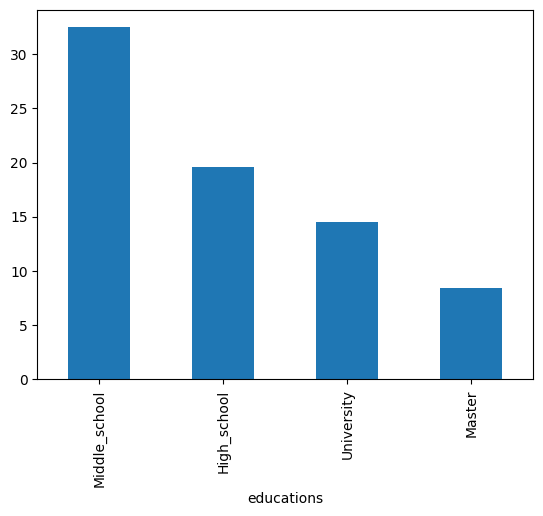

In [18]:
# Analysis educations
temp = df.groupby('educations').abandonment.mean().sort_values(ascending = False) * 100
temp.plot.bar();

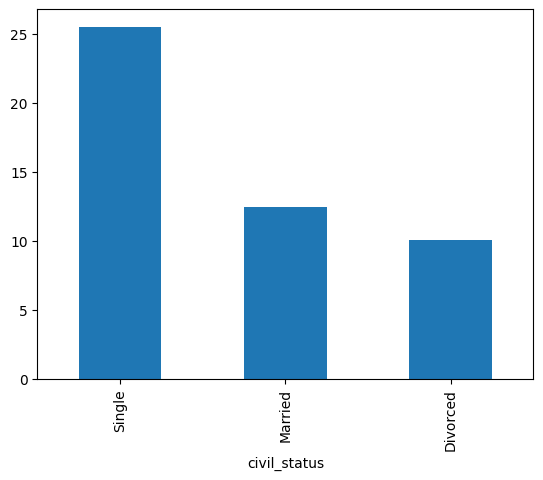

In [19]:
# Analysis civil_status
temp = df.groupby('civil_status').abandonment.mean().sort_values(ascending = False) * 100
temp.plot.bar();

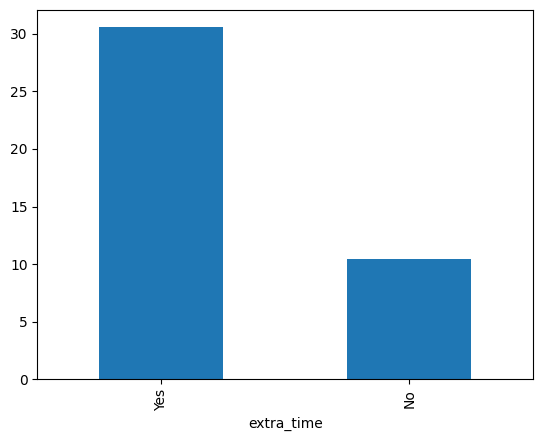

In [20]:
# Analysis extra_time
temp = df.groupby('extra_time').abandonment.mean().sort_values(ascending = False) * 100
temp.plot.bar();

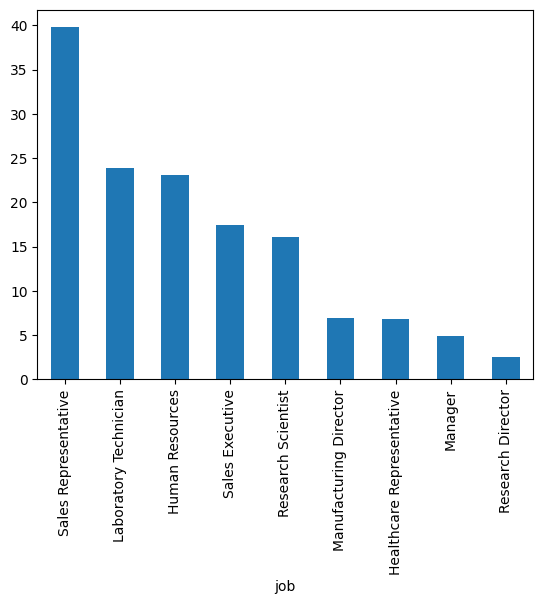

In [21]:
# Analysis job
temp = df.groupby('job').abandonment.mean().sort_values(ascending = False) * 100
temp.plot.bar();

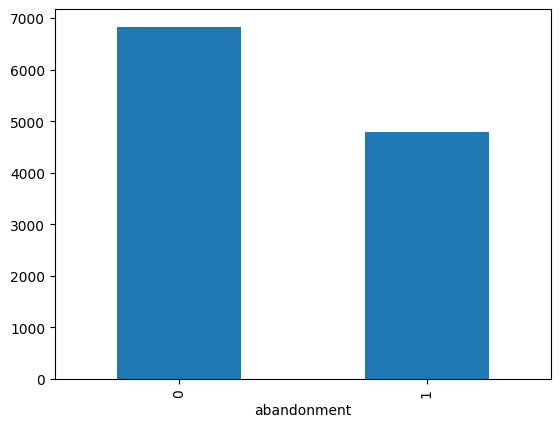

In [22]:
temp = df.groupby('abandonment').salary_month.mean()
temp.plot.bar();

Conclusions:

The average profile of the employee who leaves the company is:

* Low educational level
* Single
* Works in sales
* Low salary
* High load of overtime

## What is the economic impact of this problem?

According to the Center for American Progress' "Cost of Turnover" study:

* The flight cost of employees who earn less than 30,000 is 16.1% of their salary

* The cost of flight for employees earning between 30,000-50,000 is 19.7% of their salary

* The cost of flight for employees earning between 50,000-75,000 is 20.4% of their salary

* The cost of flight for employees who earn more than 75,000 is 21% of their salary

In [23]:
#We create a new variable salary_year of the employee
df['salary_year'] = df.salary_month.transform(lambda x: x*12)
df[['salary_month','salary_year']]

,salary_month,salary_year
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [24]:
# We calculate the economic impact of each employee if they leave the company

#List of conditions
conditions = [(df['salary_year'] <= 30000),
               (df['salary_year'] > 30000) & (df['salary_year'] <= 50000),
               (df['salary_year'] > 50000) & (df['salary_year'] <= 75000),
               (df['salary_year'] > 75000)]

#List of results
results = [df.salary_year * 0.161, df.salary_year * 0.197, df.salary_year * 0.204, df.salary_year * 0.21]

#Use select
df['abandonment_impact'] = np.select(conditions,results, default = -999)

df

,age,abandonment,travels,departament,house_distance,educations,career,satisfaction_environment,implication,job_level,...,evaluation,satisfaction_colleagues,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,salary_year,abandonment_impact
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Half,High,2,...,High,Low,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,High_school,Life Sciences,High,Half,2,...,Highher,Highher,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,High_school,Other,Highher,Half,1,...,High,Half,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Highher,High,1,...,High,High,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,High,Highher,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Highher,2,...,High,High,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,High_school,Medical,Highher,Half,3,...,High,Low,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Half,Highher,2,...,Highher,Half,1,6,0,6,0,3,73704,15035.616


## How much has this problem cost us in the last year?

In [25]:
total_cost = df.loc[df.abandonment == 1].abandonment_impact.sum()
total_cost

2719005.912

How much does it cost us if employees are not motivated? (losses in involvement == Low)

In [26]:
df.loc[(df.abandonment == 1) & (df.implication == 'Low')].abandonment_impact.sum()

368672.688

How much money could we save by better retaining our employees?

In [27]:
print(f"Reducing employee attrition by 10% would save us {int(total_cost * 0.1)}$ each year.")

print(f"Reducing employee attrition by 20% would save us {int(total_cost * 0.2)}$ each year.")

print(f"Reducing employee attrition by 30% would save us {int(total_cost * 0.3)}$ each year.")

Reducing employee attrition by 10% would save us 271900$ each year.
Reducing employee attrition by 20% would save us 543801$ each year.
Reducing employee attrition by 30% would save us 815701$ each year.


### And we can continue drawing strategies associated with abandonment insights:

We had seen that sales representatives are the position that leaves the most. Would it make sense to make a specific plan for them? What would be the cost saved if we reduced the leak by 30%?

First let's calculate the % of sales representatives who have left last year

In [28]:
total_repre_past = len(df.loc[df.job == 'Sales Representative'])
dropouts_repre_past = len(df.loc[(df.job == 'Sales Representative') & (df.abandonment == 1)])
porc_past = dropouts_repre_past / total_repre_past

porc_past

0.39759036144578314

How many leave the company this year?

In [29]:
total_repre_actual = len(df.loc[(df.job == 'Sales Representative') & (df.abandonment == 0)])
leave = int(total_repre_actual * porc_past)

leave

19

About them, how much can we retain (30% hypothesis) and how much money can it mean?

In [30]:
retain = int(leave * 0.3)

save = df.loc[(df.job == 'Sales Representative') & (df.abandonment == 0),'abandonment_impact'].sum() * porc_past * 0.3

print(f'we can retain {retain} sales representatives and that make us save {save}$.')

we can retain 5 sales representatives and that make us save 37447.22424578312$.


This data is also very interesting because it allows us to determine the budget for retention actions by department or profile.

Since we know that we can spend up to $37,000 just on specific actions to retain sales representatives and they would be paying for themselves with the avoided loss

## Machine Learning

In [31]:
df_ml = df.copy()

In [32]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   int64  
 1   abandonment                 1470 non-null   int64  
 2   travels                     1470 non-null   object 
 3   departament                 1470 non-null   object 
 4   house_distance              1470 non-null   int64  
 5   educations                  1470 non-null   object 
 6   career                      1470 non-null   object 
 7   satisfaction_environment    1470 non-null   object 
 8   implication                 1470 non-null   object 
 9   job_level                   1470 non-null   int64  
 10  job                         1470 non-null   object 
 11  job_satisfaction            1470 non-null   object 
 12  civil_status                1470 non-null   object 
 13  salary_month                1470 non-n

### Preparing data for modeling

Transform all variables categoric to numbers

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
#Categorics
cat = df_ml.select_dtypes('O')

#Instant
ohe = OneHotEncoder(sparse_output=False)

#Train
ohe.fit(cat)

#Applaied
cat_ohe = ohe.transform(cat)

#Get names
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [47]:
cat_ohe

,travels_Non-Travel,travels_Travel_Frequently,travels_Travel_Rarely,departament_Human Resources,departament_Research & Development,departament_Sales,educations_High_school,educations_Master,educations_Middle_school,educations_University,...,civil_status_Married,civil_status_Single,extra_time_No,extra_time_Yes,evaluation_High,evaluation_Highher,satisfaction_colleagues_Half,satisfaction_colleagues_High,satisfaction_colleagues_Highher,satisfaction_colleagues_Low
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Final DataSet 

Select all numbers variables in order to join the cat_ohe

In [48]:
num = df.select_dtypes('number').reset_index(drop = True)

Join everyone in the final DataSet

In [49]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,travels_Non-Travel,travels_Travel_Frequently,travels_Travel_Rarely,departament_Human Resources,departament_Research & Development,departament_Sales,educations_High_school,educations_Master,educations_Middle_school,educations_University,...,num_previous_companies,salary_increase_perc,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,salary_year,abandonment_impact
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


## Modeling Design
Separation of predictors and targets

In [50]:
x = df_ml.drop(columns='abandonment')
y = df_ml['abandonment']

Separation train and test

In [51]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

Model training on test

In [52]:
from sklearn.tree import DecisionTreeClassifier

#Instant
ac = DecisionTreeClassifier(max_depth=4)

#train
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### Prediction and valid on test

In [53]:
# Prediction
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.08849558, 0.05222437, 0.05222437, 0.05222437, 0.08849558,
       0.05222437, 0.13294798, 0.05222437, 0.08849558, 0.34782609,
       0.05222437, 0.08849558, 0.13294798, 0.13294798, 0.05222437,
       0.05222437, 0.13294798, 0.13294798, 0.05222437, 0.05222437])

In [54]:
# Evaluate
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.7063081334359046

## Interpretation

### Three

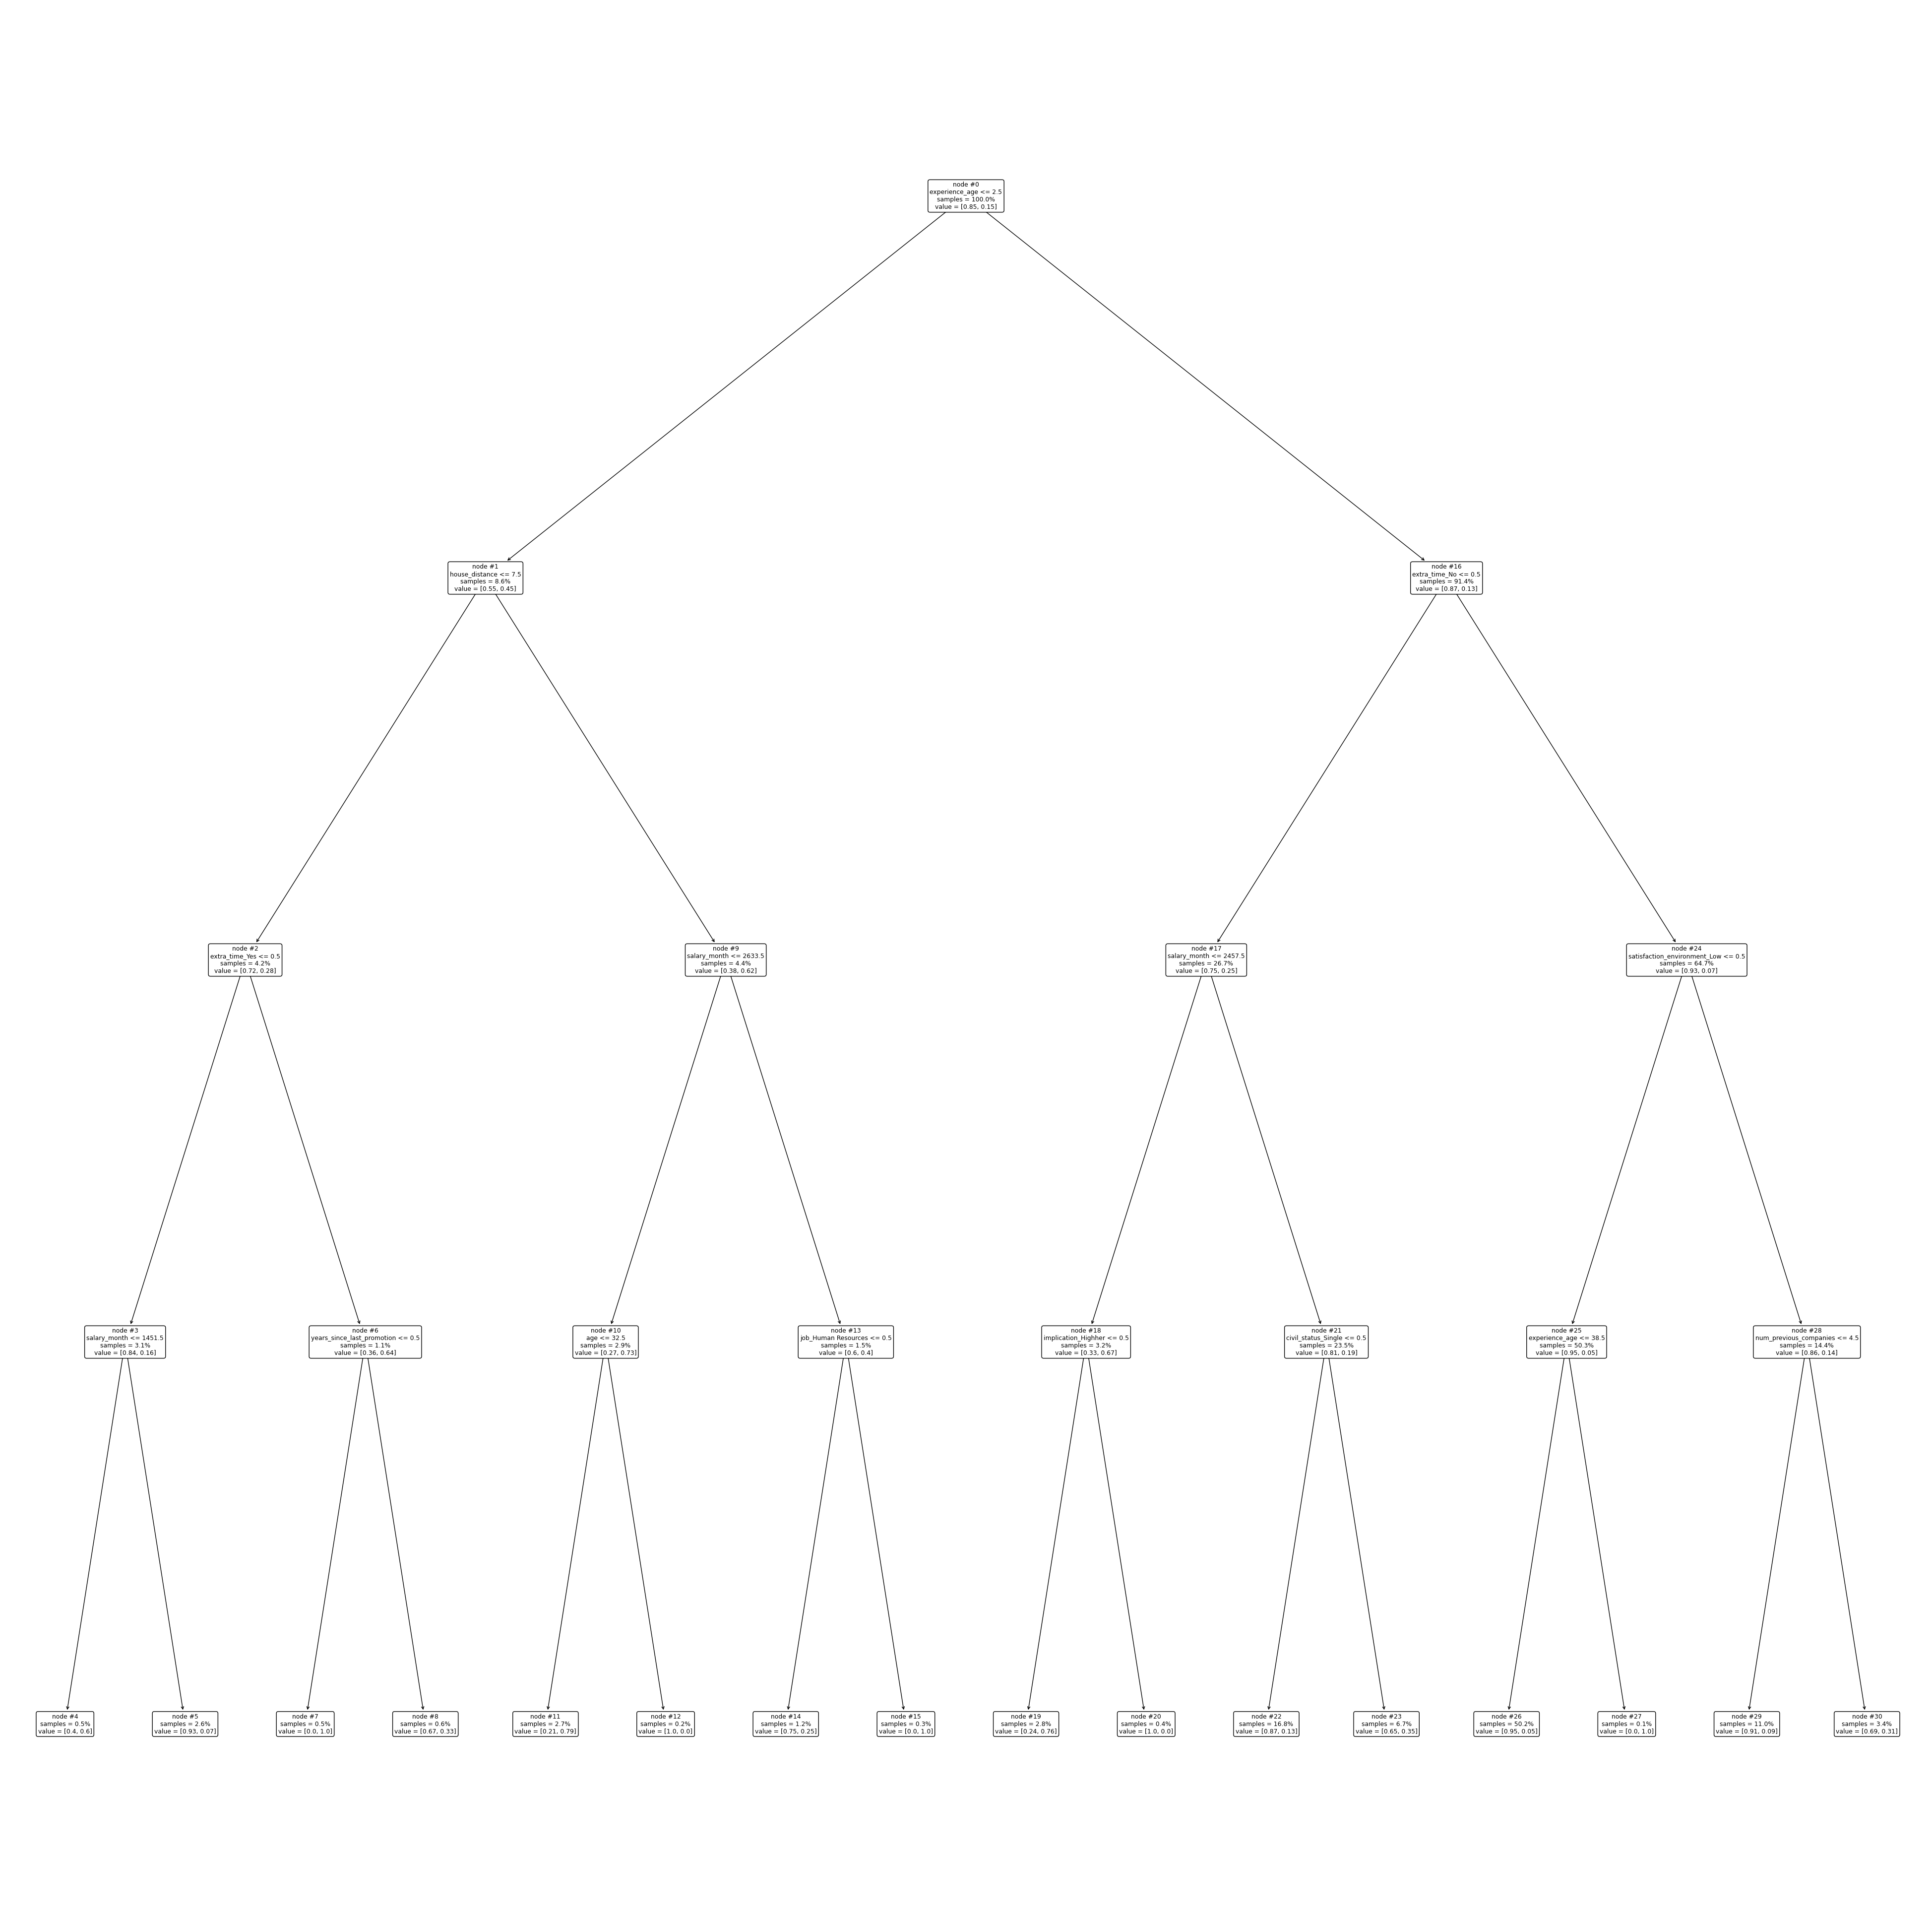

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

Relevant variables

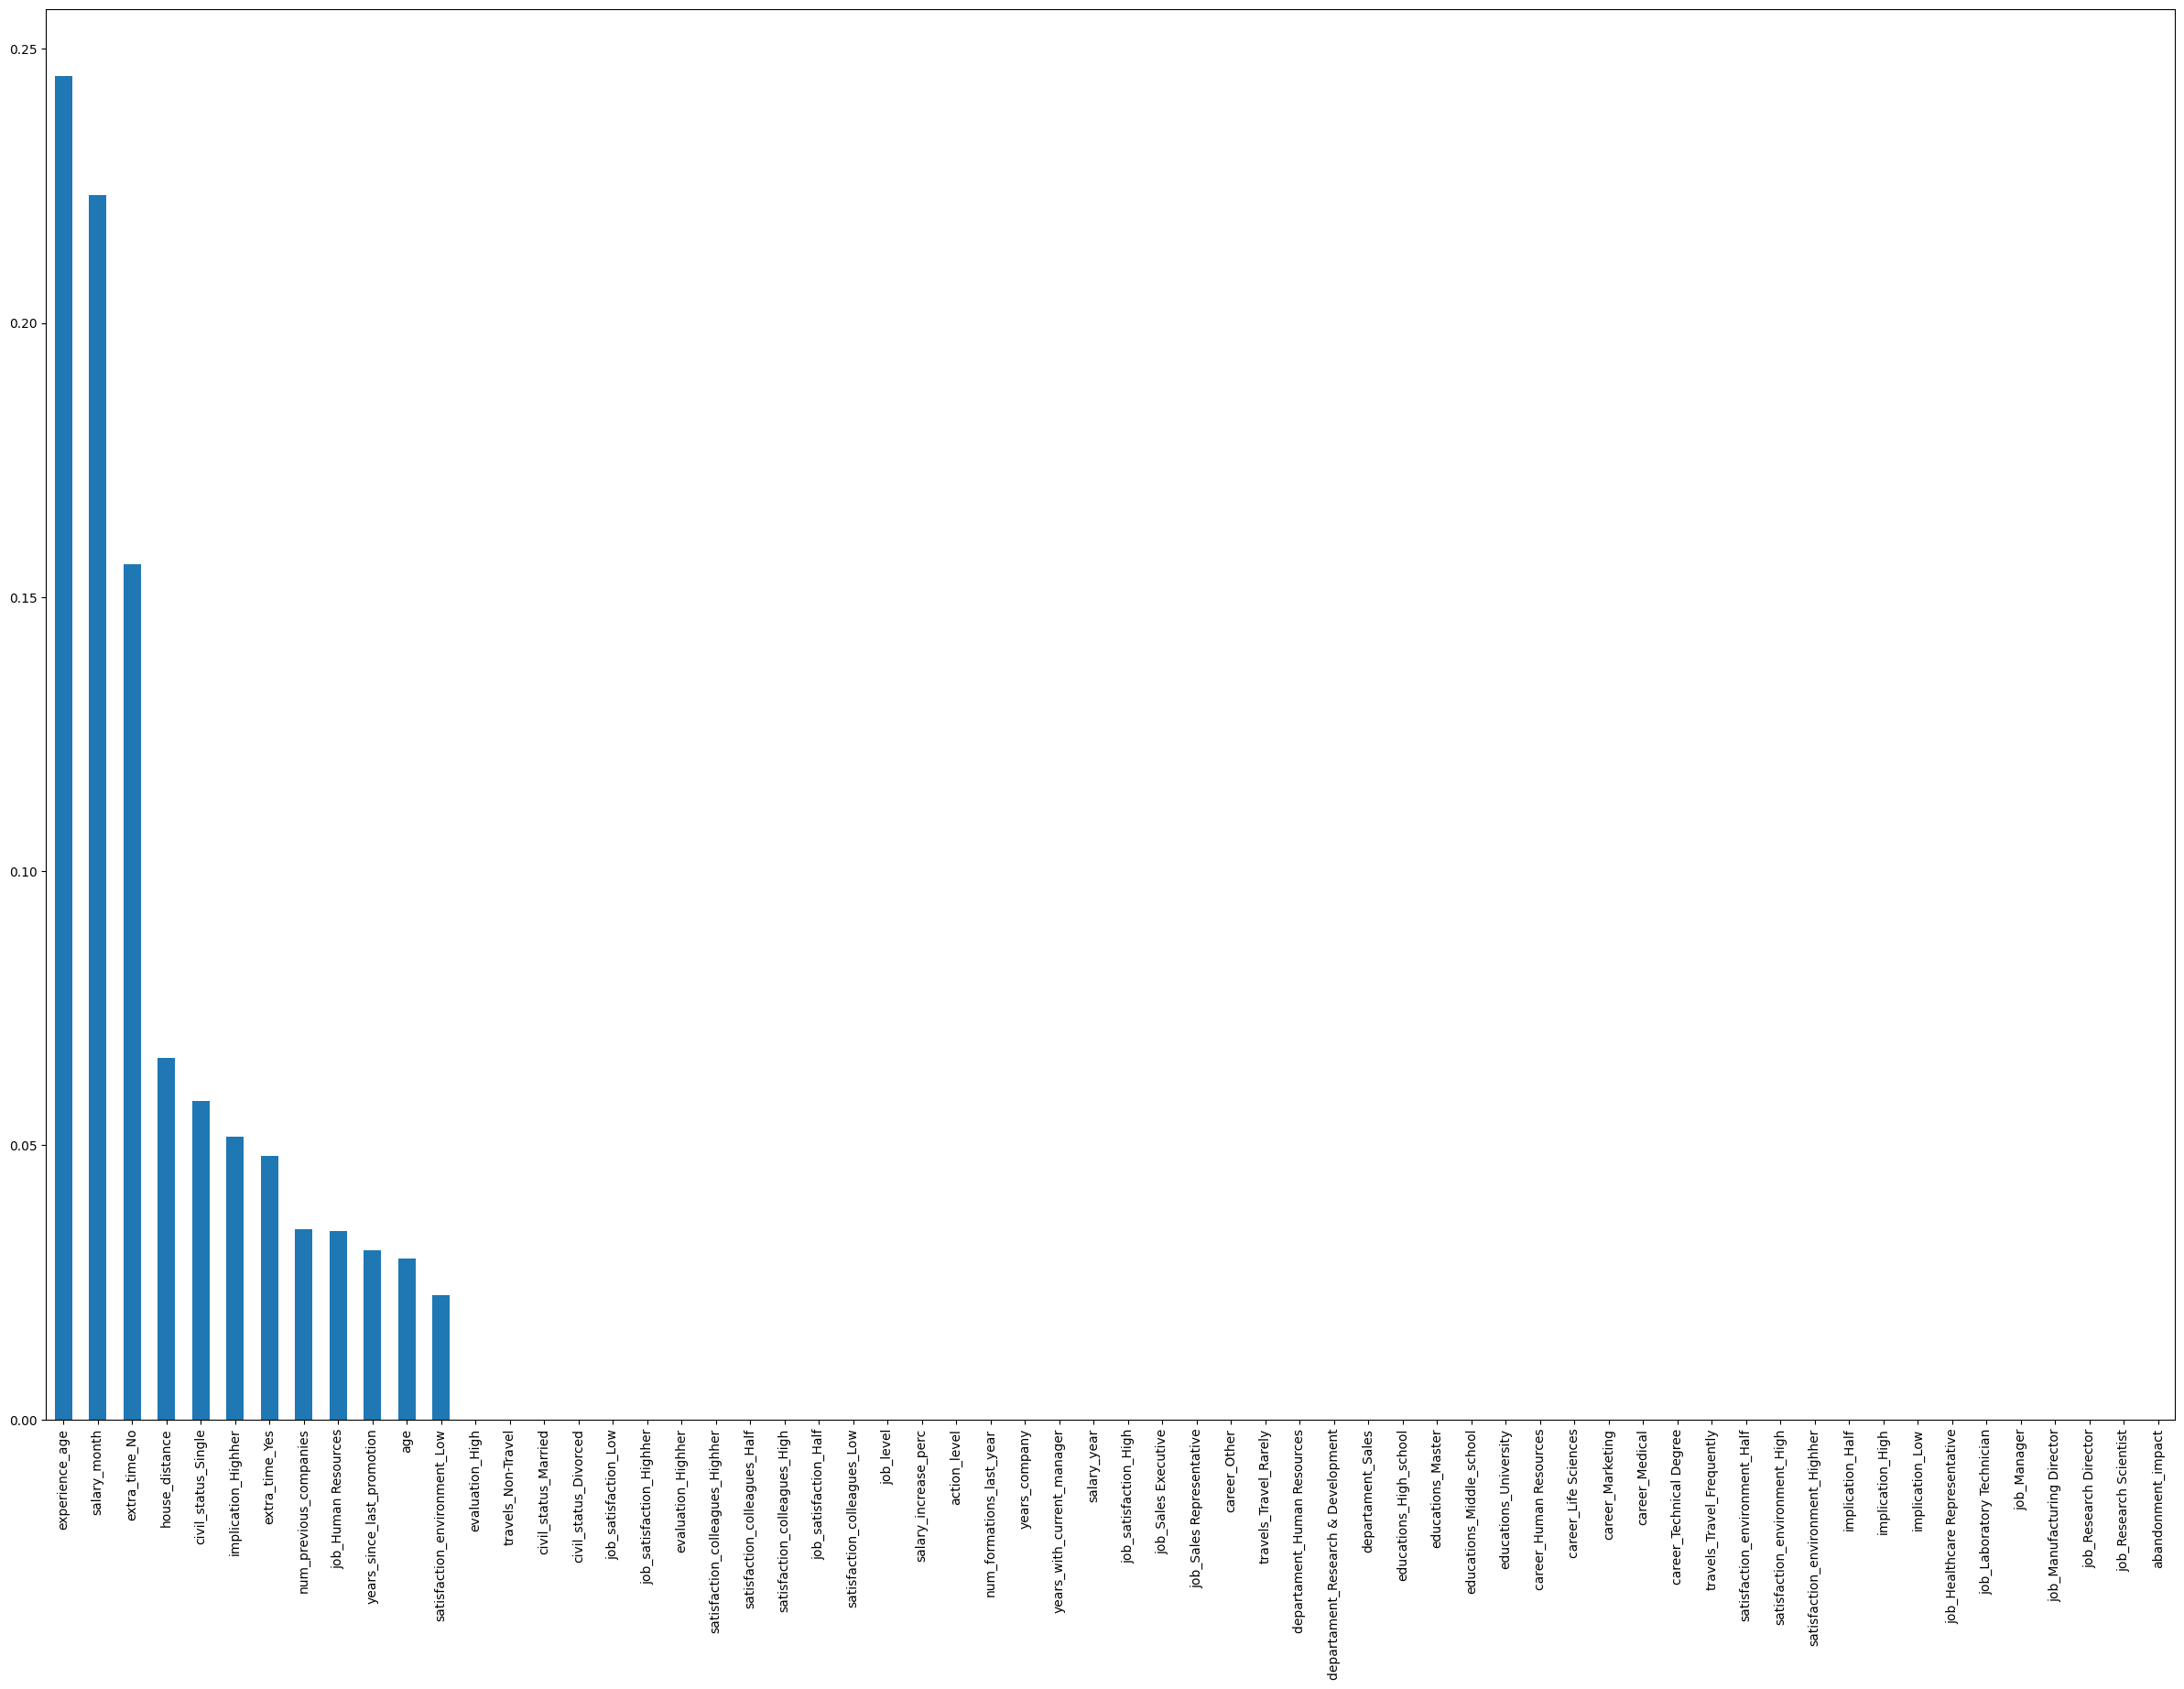

In [56]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### Explotation
Incorporation of scoring into the main DataSet

In [57]:
df['scoring_abandonment'] = ac.predict_proba(df_ml.drop(columns = 'abandonment'))[:, 1]
df

,age,abandonment,travels,departament,house_distance,educations,career,satisfaction_environment,implication,job_level,...,satisfaction_colleagues,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,salary_year,abandonment_impact,scoring_abandonment
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Half,High,2,...,Low,0,8,0,6,0,5,71916,14670.864,0.347826
2,49,0,Travel_Frequently,Research & Development,8,High_school,Life Sciences,High,Half,2,...,Highher,1,10,3,10,1,7,61560,12558.240,0.052224
4,37,1,Travel_Rarely,Research & Development,2,High_school,Other,Highher,Half,1,...,Half,0,7,3,0,0,0,25080,4037.880,0.758621
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Highher,High,1,...,High,0,8,3,8,3,0,34908,6876.876,0.132948
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,Highher,1,6,3,2,2,2,41616,8198.352,0.314286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Highher,2,...,High,1,17,3,5,0,3,30852,6077.844,0.052224
2062,39,0,Travel_Rarely,Research & Development,6,High_school,Medical,Highher,Half,3,...,Low,1,9,5,7,1,7,119892,25177.320,0.052224
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Half,Highher,2,...,Half,1,6,0,6,0,3,73704,15035.616,0.132948


Incorporation of scoring into the main dataframe

In [58]:
df.sort_values(by = 'scoring_abandonment', ascending = False)[0:10]

,age,abandonment,travels,departament,house_distance,educations,career,satisfaction_environment,implication,job_level,...,satisfaction_colleagues,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,salary_year,abandonment_impact,scoring_abandonment
id,,,,,,,,,,,,,,,,,,,,,
165,58,1,Travel_Rarely,Research & Development,23,University,Medical,Highher,High,3,...,Highher,1,40,3,40,15,6,123744,25986.240,1.0
1467,34,1,Travel_Rarely,Human Resources,9,University,Technical Degree,Low,High,1,...,Highher,0,2,0,2,2,2,32904,6482.088,1.0
1944,27,1,Travel_Frequently,Human Resources,22,High_school,Human Resources,Low,Half,1,...,Low,0,1,2,1,0,0,34356,6768.132,1.0
556,38,0,Travel_Frequently,Research & Development,2,University,Life Sciences,Highher,High,1,...,High,1,1,3,1,0,0,20424,3288.264,1.0
1569,35,1,Travel_Rarely,Research & Development,2,University,Life Sciences,Low,High,1,...,Highher,1,1,2,1,0,0,24888,4006.968,1.0
614,18,1,Travel_Frequently,Sales,5,University,Marketing,Half,High,1,...,Highher,0,0,3,0,0,0,22536,3628.296,1.0
1974,31,0,Travel_Rarely,Research & Development,2,Middle_school,Medical,Highher,Low,1,...,High,3,1,4,1,0,0,13548,2181.228,1.0
1624,18,1,Travel_Frequently,Sales,3,University,Medical,Half,High,1,...,High,0,0,2,0,0,0,18828,3031.308,1.0
485,33,1,Travel_Rarely,Sales,5,University,Marketing,Highher,High,1,...,Half,0,1,2,1,0,0,34212,6739.764,1.0


Example: risk of leaving the company for a job

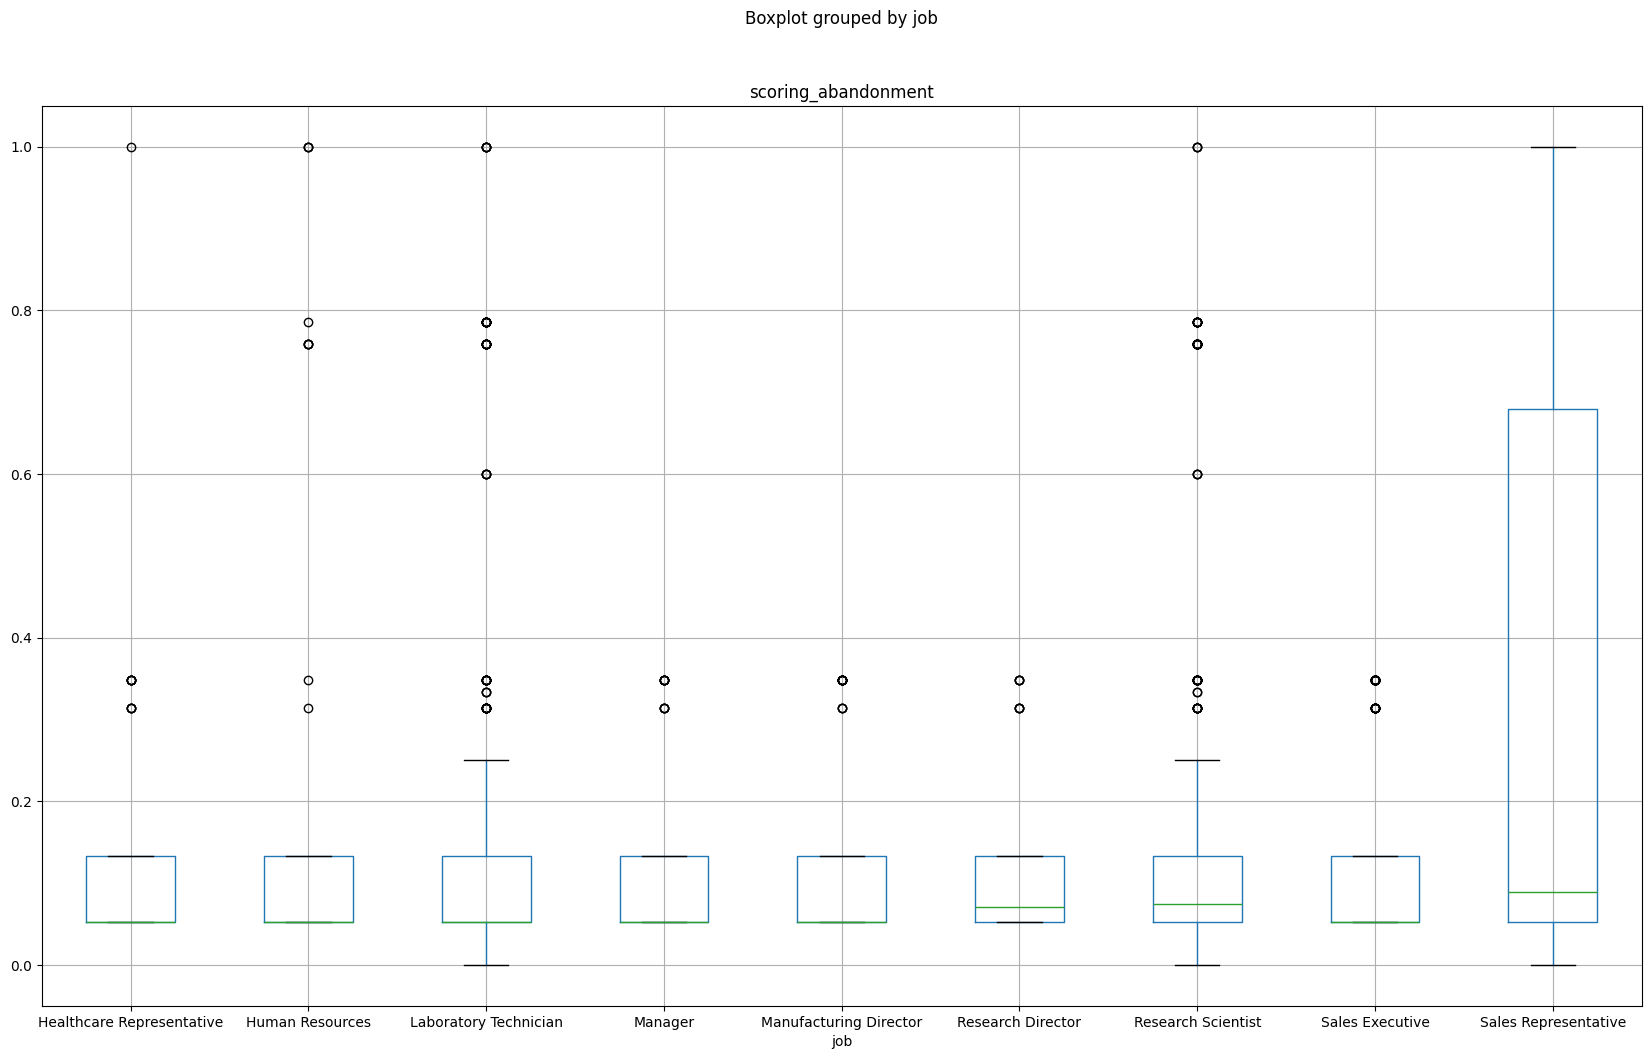

In [59]:
df.boxplot(column='scoring_abandonment', by='job', figsize = (20,12));

Save the result

In [60]:
df

,age,abandonment,travels,departament,house_distance,educations,career,satisfaction_environment,implication,job_level,...,satisfaction_colleagues,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,salary_year,abandonment_impact,scoring_abandonment
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Half,High,2,...,Low,0,8,0,6,0,5,71916,14670.864,0.347826
2,49,0,Travel_Frequently,Research & Development,8,High_school,Life Sciences,High,Half,2,...,Highher,1,10,3,10,1,7,61560,12558.240,0.052224
4,37,1,Travel_Rarely,Research & Development,2,High_school,Other,Highher,Half,1,...,Half,0,7,3,0,0,0,25080,4037.880,0.758621
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Highher,High,1,...,High,0,8,3,8,3,0,34908,6876.876,0.132948
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,Highher,1,6,3,2,2,2,41616,8198.352,0.314286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Highher,2,...,High,1,17,3,5,0,3,30852,6077.844,0.052224
2062,39,0,Travel_Rarely,Research & Development,6,High_school,Medical,Highher,Half,3,...,Low,1,9,5,7,1,7,119892,25177.320,0.052224
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Half,Highher,2,...,Half,1,6,0,6,0,3,73704,15035.616,0.132948
